In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore') 

In [3]:
df = sns.load_dataset('Tips') 
df 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
df.shape 

(244, 7)

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
df.isnull().sum() 

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [7]:
df.duplicated().sum() 

np.int64(1)

In [8]:
df1 = df.copy() 
df1 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [9]:
df1 = df1.drop_duplicates() 

In [10]:
df1.duplicated().sum() 

np.int64(0)

In [11]:
df1.describe().T 

,count,mean,std,min,25%,50%,75%,max
total_bill,243.0,19.813868,8.910071,3.07,13.38,17.81,24.175,50.81
tip,243.0,3.002387,1.385002,1.00,2.00,2.92,3.575,10.00
size,243.0,2.572016,0.952356,1.00,2.00,2.00,3.000,6.00


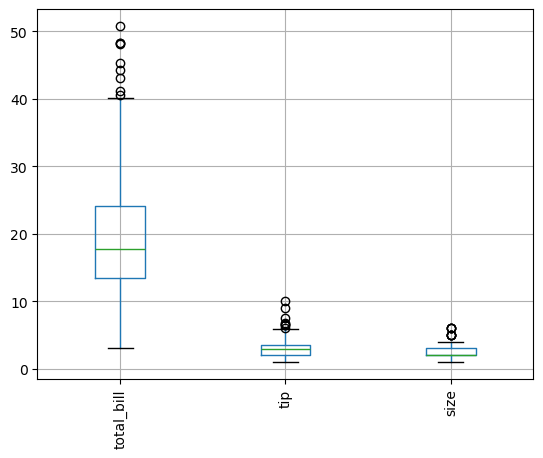

In [12]:
df1.boxplot()
plt.xticks(rotation=90)
plt.show() 

In [13]:
df.columns 

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [14]:
numericals = df1.select_dtypes(include=['int', 'float']).columns
categoricals = df1.select_dtypes(exclude=['int', 'float']).columns

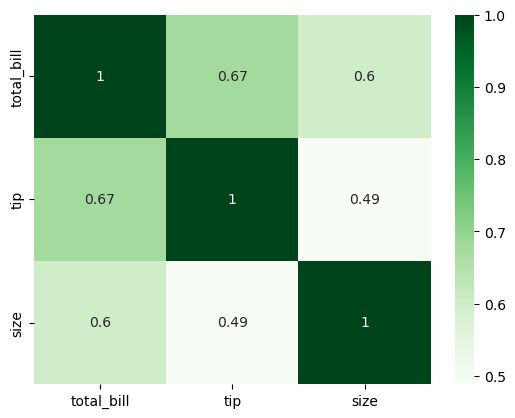

In [15]:
corr = df1[numericals].corr(method='pearson') 
sns.heatmap(corr, annot=True, cmap='Greens') 
plt.show() 

In [16]:
x = df1.drop('tip', axis=1) 
y = df1['tip'] 

In [17]:
num = x.select_dtypes(include=['int', 'float']).columns 
cat = x.select_dtypes(exclude=['int', 'float']).columns 



print("Numerical cols:", num)
print("Categorical cols:", cat)


Numerical cols: Index(['total_bill', 'size'], dtype='object')
Categorical cols: Index(['sex', 'smoker', 'day', 'time'], dtype='object')


In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
preprocess = ColumnTransformer(
    transformers=[
        ('onehot',OneHotEncoder(handle_unknown='ignore', drop='first'), cat),
        ('scaler', StandardScaler(), num)
    ]
)



In [19]:
k_estimate = int(np.sqrt(len(df1))) 
print(k_estimate)



15


In [20]:
from sklearn.model_selection import cross_val_score 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

k_range = range(1,40) 
cv_score = [] 

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)

    model = Pipeline([
        ('preprocess', preprocess),
        ('knn', knn)
    ])

    score = cross_val_score(model, x, y, cv=5, scoring='r2') 
    cv_score.append(score.mean()) 
    print(f"k = {k:2d} -> R² = {score.mean():.4f}")



k =  1 -> R² = -0.0921
k =  2 -> R² = 0.2125
k =  3 -> R² = 0.2962
k =  4 -> R² = 0.3191
k =  5 -> R² = 0.3365
k =  6 -> R² = 0.3513
k =  7 -> R² = 0.3609
k =  8 -> R² = 0.3469
k =  9 -> R² = 0.3478
k = 10 -> R² = 0.3621
k = 11 -> R² = 0.3405
k = 12 -> R² = 0.3526
k = 13 -> R² = 0.3558
k = 14 -> R² = 0.3649
k = 15 -> R² = 0.3644
k = 16 -> R² = 0.3610
k = 17 -> R² = 0.3508
k = 18 -> R² = 0.3605
k = 19 -> R² = 0.3527
k = 20 -> R² = 0.3512
k = 21 -> R² = 0.3435
k = 22 -> R² = 0.3375
k = 23 -> R² = 0.3350
k = 24 -> R² = 0.3329
k = 25 -> R² = 0.3287
k = 26 -> R² = 0.3238
k = 27 -> R² = 0.3221
k = 28 -> R² = 0.3253
k = 29 -> R² = 0.3192
k = 30 -> R² = 0.3138
k = 31 -> R² = 0.3204
k = 32 -> R² = 0.3240
k = 33 -> R² = 0.3245
k = 34 -> R² = 0.3257
k = 35 -> R² = 0.3199
k = 36 -> R² = 0.3192
k = 37 -> R² = 0.3157
k = 38 -> R² = 0.3152
k = 39 -> R² = 0.3130


In [21]:
best_k = 14

model = Pipeline([
    ('preprocess', preprocess),
    ('knn', KNeighborsRegressor(n_neighbors=best_k))
]) 

In [22]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

In [23]:
model.fit(x_train, y_train)
model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['sex', 'smoker', 'day', 'time'], dtype='object')),
                                                 ('scaler', StandardScaler(),
                                                  Index(['total_bill', 'size'], dtype='object'))])),
                ('knn', KNeighborsRegressor(n_neighbors=14))])

In [24]:
y_pred = model.predict(x_test)
y_pred 

array([2.97571429, 2.31571429, 2.64214286, 2.175     , 3.29071429,
       3.30714286, 3.89357143, 2.44714286, 2.52      , 3.16571429,
       2.54071429, 3.51571429, 2.39428571, 4.61928571, 2.12      ,
       2.24071429, 3.43      , 2.98857143, 2.95928571, 2.215     ,
       3.16642857, 2.90071429, 2.70357143, 2.175     , 3.65714286,
       2.985     , 2.19857143, 3.34214286, 2.37857143, 3.99285714,
       2.17714286, 2.025     , 2.86071429, 2.65428571, 2.97857143,
       2.06642857, 3.31785714, 2.23928571, 2.12      , 2.93      ,
       2.175     , 2.12      , 4.125     , 2.49928571, 1.98928571,
       1.93571429, 4.10214286, 2.80785714, 4.305     ])

In [25]:
from sklearn.metrics import r2_score, mean_squared_error

print(f"The R² score is: {r2_score(y_test, y_pred)*100}")
print(f"The mean squared error is: {mean_squared_error(y_test, y_pred)}") 

The R² score is: 43.32617031322828
The mean squared error is: 1.3808437213660973


In [26]:
print(x.columns)
print(x.head(2)) 


Index(['total_bill', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')
   total_bill     sex smoker  day    time  size
0       16.99  Female     No  Sun  Dinner     2
1       10.34    Male     No  Sun  Dinner     3


In [27]:
new_data = pd.DataFrame({
    'total_bill': [50.0],
    'sex': ['Female'],
    'smoker': ['No'],
    'day': ['Sat'],
    'time': ['Dinner'],
    'size': [3]
})

predicted_tip = model.predict(new_data)[0]
print("Predicted tip:", predicted_tip)


Predicted tip: 4.850714285714285


In [28]:
new_data = pd.DataFrame({
    'total_bill': [300.0],
    'sex': ['Female'],
    'smoker': ['No'],
    'day': ['Friday'],
    'time': ['Dinner'],
    'size': [10]
})

predicted_tip = model.predict(new_data)[0]
print("Predicted tip:", predicted_tip)


Predicted tip: 4.981428571428572


In [29]:
import pickle

with open("tips_knn_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved as tips_knn_model.pkl")


Model saved as tips_knn_model.pkl
